In [1]:
from trip_kinematics.HomogenTransformationMatrix import TransformationMatrix
from trip_kinematics.KinematicGroup import KinematicGroup, Transformation
import sympy as sp
from scipy.optimize import minimize

In [2]:
A = Transformation(name='gimbal_joint',values={'rx': 0, 'ry': 0, 'rz': 0}, state_variables=['rx', 'ry', 'rz'])
print(A.state)
A.set_state({"rx" :1})
print(A.state)

{'rx': 0, 'ry': 0, 'rz': 0}
{'rx': 1, 'ry': 0, 'rz': 0}


In [3]:
state=A.get_symbolic_state()
print(state['rx'])
A.set_state(state)
Trafo=A.get_transformation_matrix()

# create function of from symbolic representation
orientation = sp.lambdify([state.values()],Trafo.get_rotation()[0][0])
print(orientation)
x_0 = [0,0,0]
#orientation(x_0)
solution = minimize(orientation,x_0)

print(solution)

rx_{gimbal_joint}
<function _lambdifygenerated at 0x000001DA465C1160>
      fun: 1.0
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([ 0.0000000e+00, -7.4505806e-09, -7.4505806e-09])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0., 0.])


In [4]:
test = {'A_CSS_P_trans': {}, 'gimbal_joint': {'rx': "bla", 'ry': "blu"}}
sym_test = {'A_CSS_P_trans': {}, 'gimbal_joint': {'rx': "symbol_1", 'ry': "symbol_2"}}
values = []
state_keys= []
for keys in test.keys():
    inner_dictionary = test[keys]
    for inner_keys in inner_dictionary.keys():
        values.append(inner_dictionary[inner_keys])
        state_keys.append([keys,inner_keys])
print(values)
print(state_keys)
print(test['gimbal_joint']['rx'])

['bla', 'blu']
[['gimbal_joint', 'rx'], ['gimbal_joint', 'ry']]
bla


$$\mathtt{\text{[[cos(ry\_\{gimbal\_joint\})*cos(rz\_\{gimbal\_joint\})
  -sin(rz\_\{gimbal\_joint\})*cos(ry\_\{gimbal\_joint\}) sin(ry\_\{gimbal\_joint\}) 0]
 [sin(rx\_\{gimbal\_joint\})*sin(ry\_\{gimbal\_joint\})*cos(rz\_\{gimbal\_joint\}) + sin(rz\_\{gimbal\_joint\})*cos(rx\_\{gimbal\_joint\})
  -sin(rx\_\{gimbal\_joint\})*sin(ry\_\{gimbal\_joint\})*sin(rz\_\{gimbal\_joint\}) + cos(rx\_\{gimbal\_joint\})*cos(rz\_\{gimbal\_joint\})
  -sin(rx\_\{gimbal\_joint\})*cos(ry\_\{gimbal\_joint\}) 0]
 [sin(rx\_\{gimbal\_joint\})*sin(rz\_\{gimbal\_joint\}) - sin(ry\_\{gimbal\_joint\})*cos(rx\_\{gimbal\_joint\})*cos(rz\_\{gimbal\_joint\})
  sin(rx\_\{gimbal\_joint\})*cos(rz\_\{gimbal\_joint\}) + sin(ry\_\{gimbal\_joint\})*sin(rz\_\{gimbal\_joint\})*cos(rx\_\{gimbal\_joint\})
  cos(rx\_\{gimbal\_joint\})*cos(ry\_\{gimbal\_joint\}) 0]
 [0.0 0.0 0.0 1.0]]}}$$

### Idee erlaube transformation selbst symbolische representation zu returnen!

In [5]:
from examples.triped import triped_leg
matrix, symbolic_state_dict = triped_leg.get_symbolic_rep()
forward_kin=matrix


Calculated state values do not match given values! Using set_state() before forward_kinematics() or inverse_kinematics() is recommended.


In [6]:
forward_kin.Jacobian

AttributeError: 'numpy.ndarray' object has no attribute 'Jacobian'

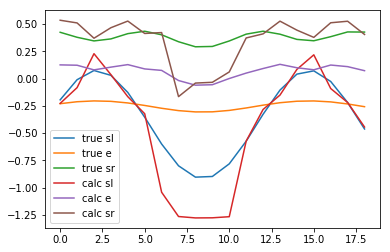

In [7]:
import csv
import os
def read_csv(filename, dtype=float):
    with open(filename) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        first = True
        lst = []
        rows = 0
        for row in reader:
            try:
                if first:
                    rows = len(row)
                    for i in range(rows):
                        lst.append([])
                    first = False

                for j in range(rows):
                    lst[j].append(float(row[j]))
            except:
                continue
        return lst
    
robot_type = "triped_leg"
inverse_reference   = read_csv(os.path.join('experiments',robot_type,'reference_solution','joint_values.csv'))
inverse_calculated  = read_csv(os.path.join('experiments',robot_type,"inverse_kinematics",'joint_values.csv'))

import matplotlib.pyplot as plt

reference_sl = inverse_reference[0] 
reference_e  = inverse_reference[1] 
reference_sr = inverse_reference[2] 

calculated_sl = inverse_calculated[0] 
calculated_e  = inverse_calculated[1] 
calculated_sr = inverse_calculated[2] 

plt.plot(reference_sl,label="true sl")
plt.plot(reference_e,label="true e")
plt.plot(reference_sr,label="true sr")

plt.plot(calculated_sl,label="calc sl")
plt.plot(calculated_e,label="calc e")
plt.plot(calculated_sr,label="calc sr")
plt.legend()
plt.show()

In [ ]:
import numpy as np
a=np.array([0,1,2])
b= 2*a
b-a